In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use("ggplot")

%matplotlib inline

In [2]:
flanks = pd.read_csv("../data/ms_peptides.csv.gz")

flanks.nseq = flanks.nseq.apply(lambda x: "" if type(x) == float else x)
flanks.cseq = flanks.cseq.apply(lambda x: "" if type(x) == float else x)

flanks.head()

sequence  count hit   nseq  npos   cseq  cpos        proteinid  \
0      KLAPISIMY      0   +  LLTWQ   134  QISPS   204  ENSP00000355046   
1     TIFAGTLITA      0   +  PVIYS    11  LSSHW   326  ENSP00000355046   
2     TIFAGTLITA      1   +  PVIYS    11  LSSHW   326  ENSP00000355046   
3  FFDPAGGGDPILY      0   +  NLNTT   218  QHLFW   282  ENSP00000354499   
4      IIAIPTGVK      0   +  TSATM   310  VFSWL   194  ENSP00000354499   

            geneid    mhc  mhc_msms  gene_expr  half_life  
0  ENSG00000198763  A0301         7      4.971        0.0  
1  ENSG00000198763  A0201         2      4.971        0.0  
2  ENSG00000198763  A0203         5      4.971        0.0  
3  ENSG00000198804  A2902         2      8.715        0.0  
4  ENSG00000198804  A0301         3      8.715        0.0

In [3]:
np.random.seed(42)

train = []
test = []

np.random.seed(42)
for cur_mhc in flanks.mhc.unique():
    mhc_flanks = flanks.loc[flanks.mhc == cur_mhc]
    zeros = np.where(mhc_flanks.hit.values == "-")[0]
    ones = np.where(mhc_flanks.hit.values == "+")[0]
    
    train_zeros, test_zeros = train_test_split(zeros, test_size=0.2)
    train_ones, test_ones = train_test_split(ones, test_size=0.2)
    
    train.append(train_zeros)
    train.append(train_ones)
    
    test.append(test_zeros)
    test.append(test_ones)
    
train_flanks = flanks.iloc[np.concatenate(train)]
test_flanks = flanks.iloc[np.concatenate(test)]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


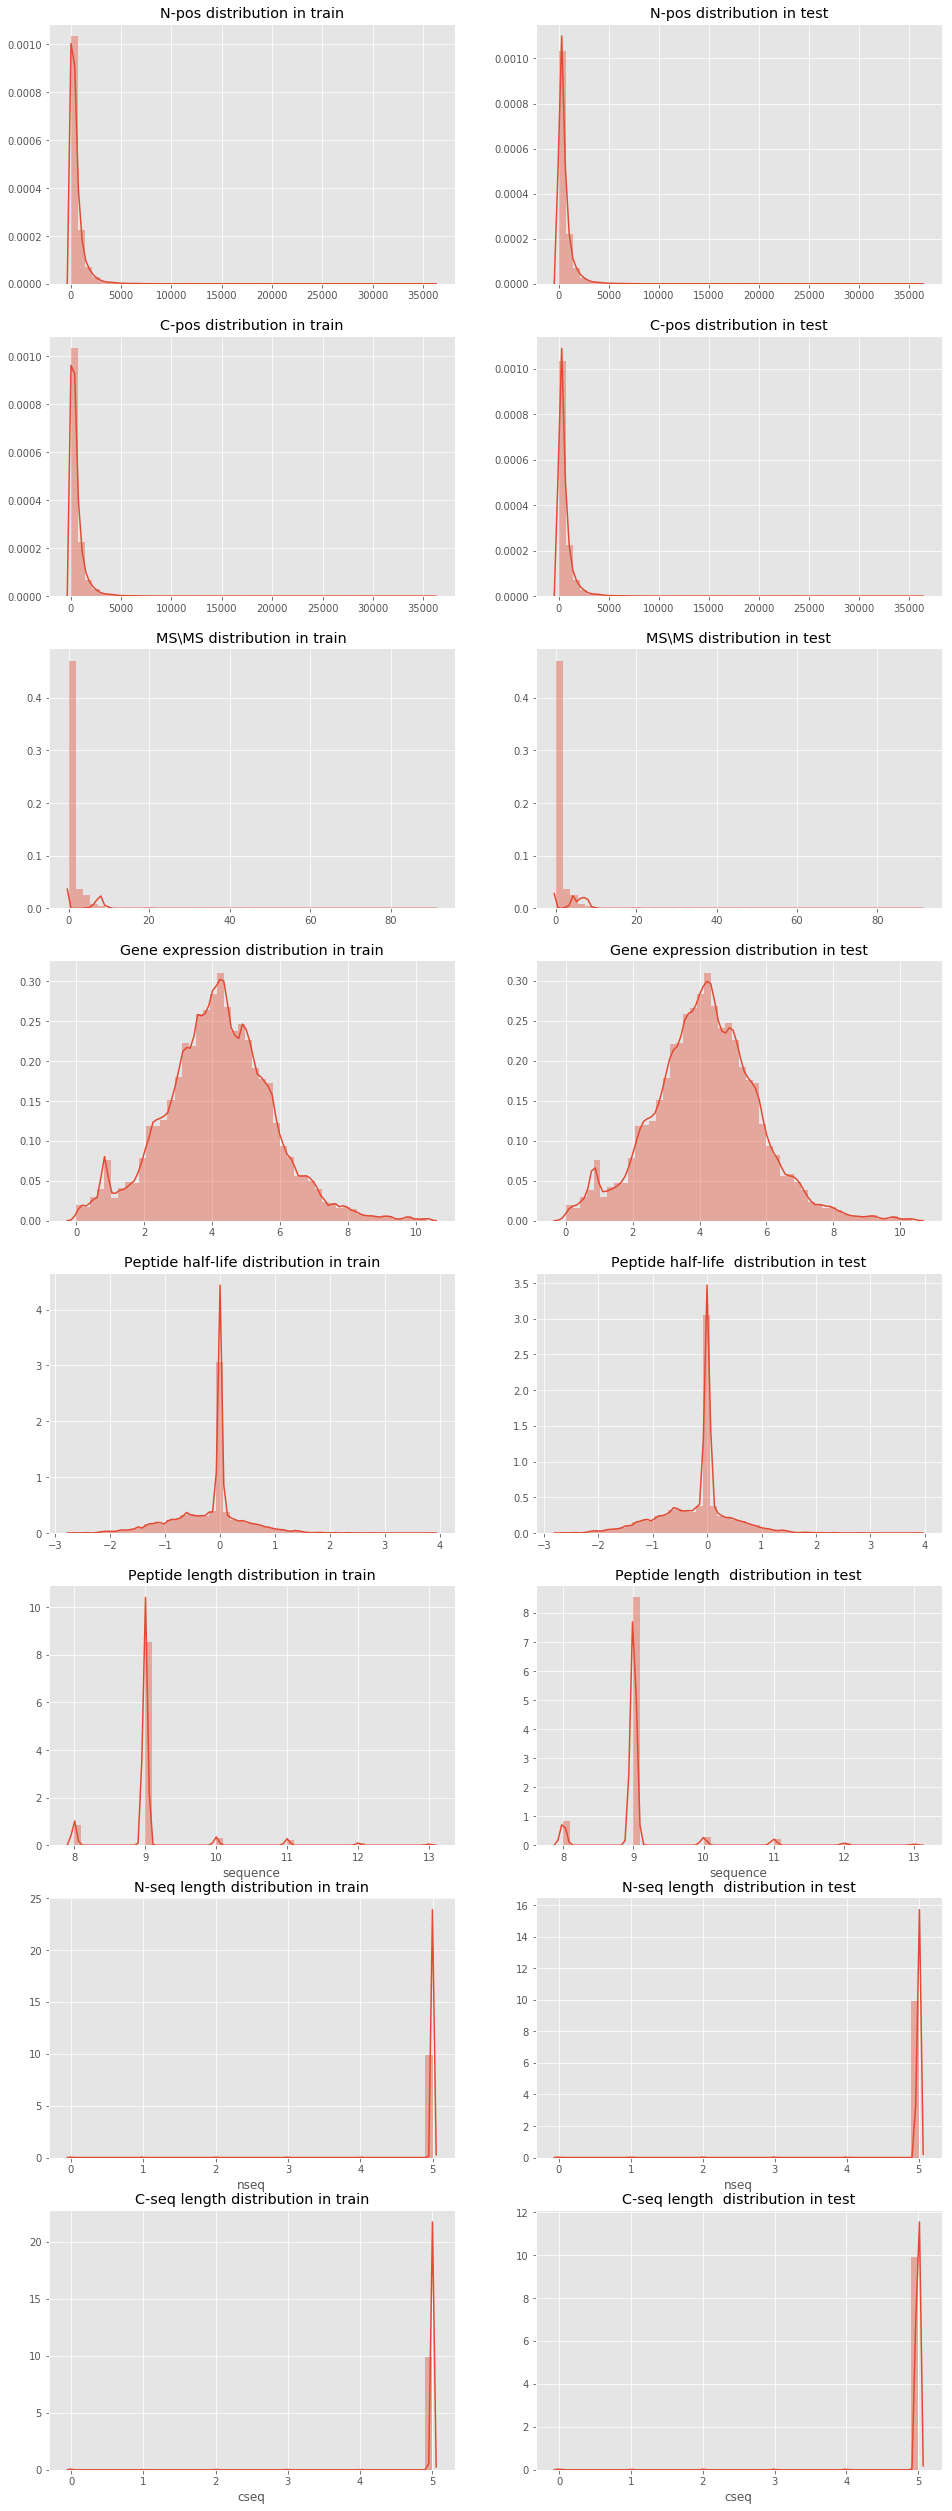

In [4]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=8, ncols=2, figsize=(16, 45))

ax1[0].set_title("N-pos distribution in train")
sns.distplot(train_flanks.npos.values, ax=ax1[0])

ax1[1].set_title("N-pos distribution in test")
sns.distplot(test_flanks.npos.values, ax=ax1[1])

ax2[0].set_title("С-pos distribution in train")
sns.distplot(train_flanks.cpos.values, ax=ax2[0])

ax2[1].set_title("С-pos distribution in test")
sns.distplot(test_flanks.cpos.values, ax=ax2[1])

ax3[0].set_title("MS\MS distribution in train")
sns.distplot(train_flanks.mhc_msms.values, ax=ax3[0])

ax3[1].set_title("MS\MS distribution in test")
sns.distplot(test_flanks.mhc_msms.values, ax=ax3[1]) 

ax4[0].set_title("Gene expression distribution in train")
sns.distplot(train_flanks.gene_expr.values, ax=ax4[0])

ax4[1].set_title("Gene expression distribution in test")
sns.distplot(test_flanks.gene_expr.values, ax=ax4[1])

ax5[0].set_title("Peptide half-life distribution in train")
sns.distplot(train_flanks.half_life.values, ax=ax5[0])

ax5[1].set_title("Peptide half-life  distribution in test")
sns.distplot(test_flanks.half_life.values, ax=ax5[1])

ax6[0].set_title("Peptide length distribution in train")
sns.distplot(train_flanks.sequence.str.len(), ax=ax6[0])

ax6[1].set_title("Peptide length  distribution in test")
sns.distplot(test_flanks.sequence.str.len(), ax=ax6[1])

ax7[0].set_title("N-seq length distribution in train")
sns.distplot(train_flanks.nseq.str.len(), ax=ax7[0])

ax7[1].set_title("N-seq length  distribution in test")
sns.distplot(test_flanks.nseq.str.len(), ax=ax7[1])

ax8[0].set_title("C-seq length distribution in train")
sns.distplot(train_flanks.cseq.str.len(), ax=ax8[0])

ax8[1].set_title("C-seq length  distribution in test")
sns.distplot(test_flanks.cseq.str.len(), ax=ax8[1])